### Import all modules  - numpy, pandas, Linear and logistic regression modules and train_test_split

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd

### Import seaborn and matplotlib for plotting heatmap, histograms and other graphs

In [72]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### Read csv file

In [117]:
filename = ("../Downloads/housepricedata.csv")
data = pd.read_csv(filename)

### Examine the data structure
     use shape and head to see the structure and the first few rows of data

In [75]:
data.shape


(21613, 13)

In [6]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,98178,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,98125,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,98028,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,98136,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,98074,1800,7503


### find correlation between the price and other fields
    use a heatmap to represent the correlation matrix and figure out the highly corelated fields.

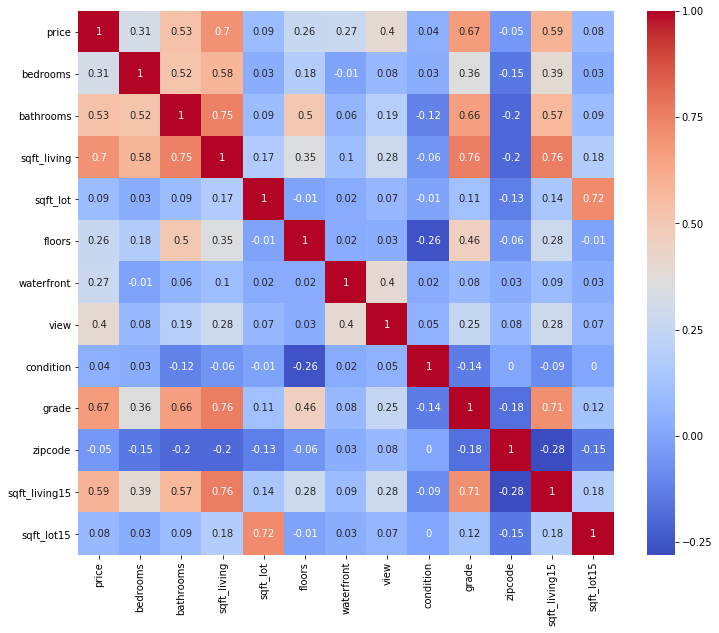

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().round(2),cmap='coolwarm',annot=True)

From the heatmap, we can safely derive that the fields 'bathrooms, 'grade', 'sqft_living' and 'sqft_living15' 
have some correlation with the price field.

In [9]:
data.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,-0.053203,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,-0.152668,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,-0.203866,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,-0.199430,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,-0.129574,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,-0.059121,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.030285,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.084827,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.003026,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,-0.184862,0.713202,0.119248


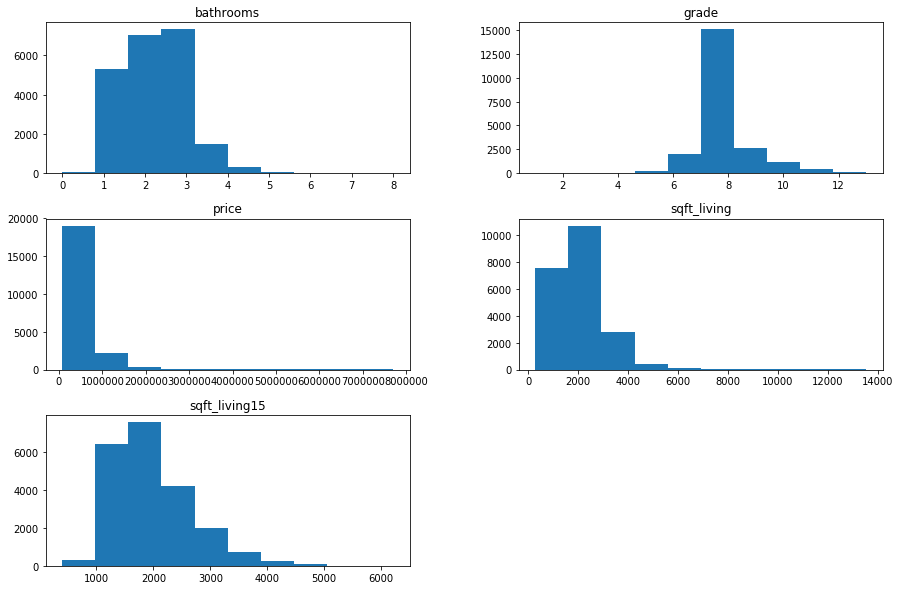

In [22]:
data.hist(bins=10,figsize=(15,10),grid=False);

C:\Users\i313684\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


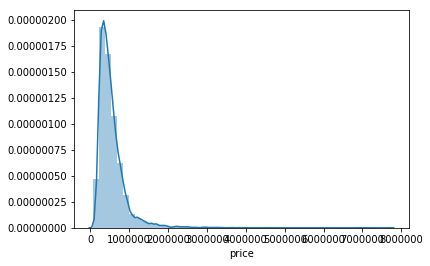

In [11]:
sns.distplot(data['price']);

__Zipcode is a number, but categorical in nature..__
- Houses in and around a certain zipcode could be priced higher or lower. Hence it has to be encoded to be included in the model. 
- use get_dummies from pandas and convert each zipcode to a feature and encode it.
- This will add around 70+ columns/features


In [118]:
data = pd.concat((data,pd.get_dummies(data.zipcode)),1)

- Create new array to hold price field.
- Remove the price fieald and  create a new features array.
- Use head and view the new features dataset

In [128]:
prices = data['price']
#data = data.drop(['bedrooms','sqft_lot','floors','view','waterfront','condition','zipcode','sqft_lot15'], axis = 1)
features = data.drop('price', axis = 1)
data.head()
#features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [130]:
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,1180,5650,1.0,0,0,3,7,98178,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,98125,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,98028,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,98136,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,98074,...,0,0,0,0,0,0,0,0,0,0


__Plot the regression line to visualize the correlation between price and the various features__

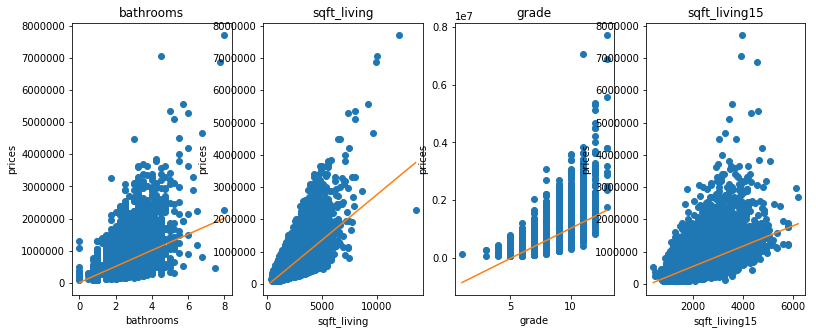

In [24]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):    
    plt.subplot(1, 6, i+1)
    x = features[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(numpy.unique(x), numpy.poly1d(numpy.polyfit(x, y, 1))(numpy.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

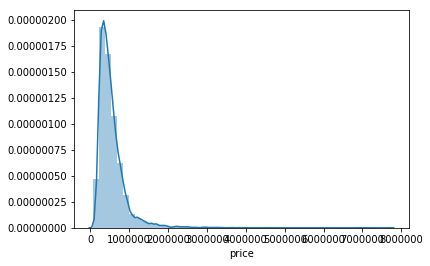

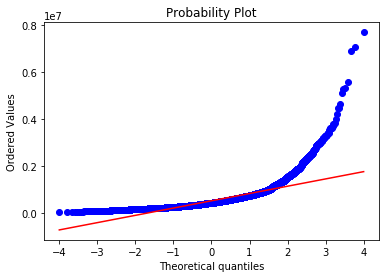

In [25]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(data['price'], hist=True);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)


In [125]:
features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,1180,5650,1.0,0,0,3,7,98178,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,98125,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,98028,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,98136,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,98074,...,0,0,0,0,0,0,0,0,0,0


__Use LinearRegression to create a model__
- use train_test_split to split the dataset in training and testing sets. keep 30% for testing
- fit and get the accuracy using the score function

In [124]:
array = features.values
X = array[:,:]
Y = prices
test_size = 0.33
seed = 2
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, test_size=test_size,
random_state=seed)
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("Accuracy Score  : {}". format(finalResult))


Accuracy Score  : 74.3637883784


__PCA - use PCA with n_components = 74, close to the total features__
- The accuracy is around the same value as earlier

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=74)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)  
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("Accuracy Score  : {}". format(finalResult))

Accuracy Score  : 74.3634357068


__Reduce PCA n_components to 70 and fit it again.__
- The accuracy is reduced to 72.
- We can further lower the components count and observe that the accuracy reduces.
- Hence using PCA to reduce the features, does not improve the accuracy for our model

In [129]:
pca = PCA(n_components=70)  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)  
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("Accuracy Score  : {}". format(finalResult))

Accuracy Score  : 72.3224313564


In [136]:
ypred_test = model.predict(X_test)
for i in range(len(ypred_test)):
    print ypred_test[i]

 689016.9285601052
769200.8568312647
526308.3295568457
1088328.6290440862
50737.79057180107
925494.4272932649
541223.8311255779
576457.5997252216
547722.9196714561
698312.6550187278
529825.5163245199
825646.2648034767
359386.37863497855
427150.1916966369
612961.9699927496
719189.5780240824
649906.1068823562
803795.361177126
1630604.7212591986
1095480.9412201974
59457.58091726393
1244870.603501827
1294930.2992742928
212612.74363786168
210309.7498933809
224622.89852334693
768629.5314913531
1307741.7745482526
483434.08436818497
214301.98083581583
938223.1813109075
665514.9541030035
349130.21015867504
613495.6721460235
90546.00933297578
615893.645728202
65423.92967448739
403499.49797575246
585983.6834459255
607847.9133220862
542107.1906220359
869987.5598251435
1192537.7757799043
251876.53463674063
472913.5905786104
192274.91982419533
530071.8570369263
1918648.7202956886
558692.2309018709
314344.4942397298
371167.2255107686
213531.32804141194
191434.0064835
261209.01135455386
257000.1605420

357820.1746539965
345241.0769496382
119833.95469084778
193898.65292683284
785766.5262562037
779337.9656520018
523572.8697225948
328109.3624180426
565684.9198413376
493934.2235717597
412261.27731110755
211860.60379175114
413900.76869089983
712071.604108606
126811.73645035306
140897.2524719357
832864.6046715205
554870.4237933396
505047.30574161373
626474.013120267
649878.3669981926
471318.09793557203
884391.2702936247
613275.3500246684
1158951.5015336592
285950.2273994057
437001.7249920164
530124.6969194501
340443.3606716888
687945.1018500236
326956.83484171284
24303.5506863998
615089.3602995246
898194.767432048
358349.0944470256
147204.50838327123
691244.0539495402
327223.4474613195
690413.4996192404
179209.25076656474
594562.7959559846
452087.80853468453
500005.61881894764
404028.45294148434
404170.28698981425
399003.6727869573
375135.9969279144
217927.53383253113
851931.4677518713
484219.89555683406
579182.4897214994
1471301.2471516796
209347.9155639009
284172.7694425533
385865.604209

248928.83265480783
370281.76535933017
1526124.6857032352
145564.89022201777
252509.77139954397
428318.858118575
655368.8432057132
471597.2219107591
255521.35240699782
692380.880977572
178919.35420824512
649156.2362016474
64908.89623095299
257231.70176510123
629322.9927075015
219193.2022255495
462543.53757126664
676081.818851143
820258.2112145296
647321.813954196
422708.4118992601
218096.67772832297
424131.62255988154
605804.5672070475
442488.0059520303
552238.8696665296
433889.7742982327
812361.542278945
246729.43277334596
794089.9011315946
1010679.9667016489
382116.9469392077
61281.674442210235
1171353.6201826637
940237.5796372963
97789.59554151952
347400.51439810084
422260.6580578702
1074728.9305756073
231233.8576308288
405915.2358041612
827956.9649799482
659395.5460276701
1362234.2594467334
746029.4038279359
669556.2685829708
843726.1932211367
184209.2608790169
333255.01653080236
155156.27480397088
253506.27473039937
456999.67790761526
329820.88761610235
448310.22737189714
639829.94

634529.970368215
516169.21928606817
498181.3813723794
115127.12023682916
334334.7241372444
379607.3156496568
148695.92874244566
269235.04736731143
567216.3398406534
304960.9552435328
421624.8975658798
365122.29694294266
466999.0561937616
538676.8866585399
675645.3250116562
486675.26743791846
459685.4278222522
447105.78936555237
271253.99989913614
248541.084314693
549122.7543931149
163494.95463031385
2256179.2354441434
642877.0349982948
285212.0246292426
389340.31869348086
694164.6622328088
118538.0655177433
244173.06332416023
403555.80721899535
142600.30069204897
339755.8926193421
918700.4918459856
177006.7160233556
422248.3022377299
490496.33433576976
348704.1018705165
230248.77820271917
378785.2947245349
434379.3046276146
233894.88991988398
838813.7619797947
849103.4146720262
717041.4037722324
347357.0202415504
1164777.9690675219
554534.1956087195
104112.64877434028
603494.9893469224
409393.2128318782
378551.3290218837
446193.90838218736
1205444.2166076517
679329.3031849423
234703.60

318724.4625289288
628226.88535763
832258.3421335905
305399.1689343926
301993.7007235709
501898.4175260549
609324.9526290332
-88525.1928439443
409587.4846553147
1377588.6584150507
281560.46174597635
1017544.9336338099
275153.70685409964
494380.24669686815
306758.24018201994
542866.6286283097
513034.06979126425
406413.4996875202
618116.1810095669
405618.0451173333
651125.1012314248
302095.8754688854
1458253.1551675317
753021.6309333028
645654.2609296395
944548.5976518978
499656.7640718183
1034571.2324869621
577522.2221412561
244121.3654383145
835295.4928173608
199819.43808089435
526932.9926786164
423324.4140320559
338767.6182199374
281367.1846612771
329331.5647413961
283599.30858795554
606118.7659990157
620872.8790689909
852600.6038691283
472215.2875362959
674592.2690299295
752847.0281094701
723785.8454001283
427724.85602824687
852320.4053159493
294487.52510623186
235059.20178423444
362481.183855386
473919.51885238336
905820.3965772421
214154.94753911596
467098.6275271642
854475.09874416

708387.4035664044
645804.4528172985
679919.6965768706
449884.8776059188
279325.8912302677
202365.97559600277
473735.0508409772
380754.0692131268
839395.1429286483
323754.0997285043
294001.01781126874
698215.7937735602
1210939.5026504544
480033.35479214124
514254.8361464398
543173.6140544504
675263.9976433692
226351.27144383936
684607.4972485412
503574.026917446
547534.3001258953
990613.9379028147
553258.5865654892
419731.7525758684
525787.1106652594
479084.25996107695
97383.61800067354
364731.5172683294
681913.9043948315
1006304.8344101142
394212.511215472
348325.90884278354
537102.8676261569
318467.89023287606
273692.0387105922
227851.59810858063
587796.7416790891
305477.9812243304
599658.959679753
577446.0716010334
234360.7982121248
752292.3357101053
396309.2364485635
415263.4067767745
436810.9180990836
788476.4882745581
383642.01994618424
562220.537540134
412666.22975211486
463336.52654230123
126052.02965487604
1263039.4949039966
824569.5983565291
404380.6199444059
418081.9466218581

667194.176610272
491440.8777283535
626185.5826678073
660070.1591853056
256622.56265011994
1029205.9362390322
222886.4803290256
487620.26514958905
359445.1464729954
344684.08406795026
1063582.6028917907
525053.0991310175
596293.7824461649
579671.2725406648
580918.8888332441
269574.6293066329
276761.1035664673
137847.80678462965
486196.1848080996
449254.86215373816
705718.1700739276
333027.3088785136
202181.94937950082
141665.60028165625
259022.74224566016
284108.24602675677
202487.31233145646
1611736.4260661756
675801.5180595254
426686.2331731288
1825240.8317444008
218121.3495765571
397294.9815398994
954356.3784596835
930442.7860294895
870717.6046003854
574425.322038315
983981.1712411451
362916.4685597064
75561.33707612491
694131.256879155
322420.3796858338
325469.5679807383
527566.6437995181
714130.0615047219
937401.5063909055
868310.7103322699
600429.9159859401
378234.7915168997
695225.6020140694
415302.5419552551
483042.60941503977
711666.4603741441
122163.58276286954
282180.66155339

In [137]:
Y_test

6638      735000
7366     1150000
3158      350500
9117      860000
3392      122000
305       725000
14462     417000
6196      594950
10194     471000
13457     634950
8698      500000
18573     768000
6675      323000
4287      430000
3604      625000
7168      710000
16322     620000
11024     665000
527      1600000
17036     875000
12418     244900
12236    1305000
20224    1789950
9856      629000
6974      275000
10505     385000
14246     545000
1754     1038000
18229     475000
6761      269950
          ...   
1066      140000
12001     225000
16878     469000
10089     383610
18671     383000
8511      360000
14906     263950
9715      485000
16700     580000
10059     510000
9943      689000
16289     295500
2496      280000
3258     1900000
15139     390000
330       880000
4663      409000
16845     800000
17231     265000
3030      565000
5677      329000
1542      375000
19086     774900
17426     775000
14625     855000
16007     505000
18636     683000
15136     4250